In [2]:
#!/usr/bin/python
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
import glob
from functions import *
import scipy
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import spectrogram
from matplotlib.pyplot import specgram


In [3]:
directory = '/raid/togzhan_syrymova/lump_project/data/'
os.chdir(directory)
glob.glob('*.csv')

['df_dev_raw_8.csv',
 'df_train_stdev_1.csv',
 'df_train_raw_8.csv',
 'test_pressure_data_without_raw.csv',
 'df_dev_0_1_8.csv',
 'test_pressure_data_with_raw.csv',
 'df_test.csv',
 'df_test_stdev_1.csv',
 'test_labels.csv',
 'df_dev_stdev_1.csv',
 'test_pressure_data_with_0_1.csv',
 'df_train_0_1_8.csv',
 'test_pressure_data_without_0_1.csv']

In [4]:
directory = '/raid/togzhan_syrymova/lump_project/data/'
os.chdir(directory)
csv_files_train = glob.glob('df_train*raw*8.csv')
csv_files_test = glob.glob('test*raw*.csv')
csv_files_dev = glob.glob('df_dev*raw*8.csv')

index = 0

df_train_ = pd.read_csv(csv_files_train[index], sep = ',', header = None)
df_train_ = pd.DataFrame(df_train_.values[1:,:])

df_test1 = pd.read_csv(csv_files_test[index], sep = ',', header = None)
df_test2 = pd.read_csv(csv_files_test[index+1], sep = ',', header = None)
df_test_ = pd.concat([df_test1, df_test2], axis = 1)
df_test_ = df_test_.transpose()

df_dev_ = pd.read_csv(csv_files_dev[index], sep = ',', header = None)
df_dev_ = pd.DataFrame(df_dev_.values[1:,:])


print(csv_files_train, '\n')
print(csv_files_test, '\n')
print(csv_files_dev, '\n')

print(csv_files_train[index], '\n')
print(csv_files_test[index], '\n')
print(csv_files_dev[index], '\n')


train_y1 = pd.DataFrame(np.round(df_train_.values[:,-1].astype('float64')/10))
dev_y1 = pd.DataFrame(np.round(df_dev_.values[:,-1].astype('float64')/10))
test_y1 = pd.concat([ pd.DataFrame([0 for i in range(2*32*9)]), pd.DataFrame([1 for i in range(2*32*9)])], axis=0)
test_y1 = test_y1.reset_index(drop=True)


df_train1 = pd.DataFrame(df_train_.values[:,:-1].astype('float64'))
df_dev1 = pd.DataFrame(df_dev_.values[:,:-1].astype('float64'))
df_test1 = df_test_.astype('float64')

['df_train_raw_8.csv'] 

['test_pressure_data_without_raw.csv', 'test_pressure_data_with_raw.csv'] 

['df_dev_raw_8.csv'] 

df_train_raw_8.csv 

test_pressure_data_without_raw.csv 

df_dev_raw_8.csv 



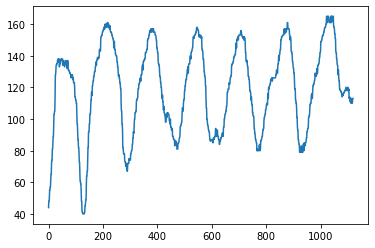

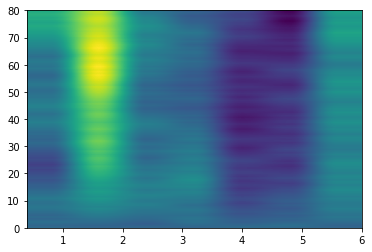

In [70]:
i = 6
import scipy
from matplotlib.pyplot import specgram
from scipy.fft import fft, ifft, fftfreq

fs = 160

# f, t, Sxx = spectrogram(df_train1.values[1, i*1120:(i+1)*1120], fs=fs, detrend='constant', noverlap=128, nperseg =160)
# plt.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud')
# plt.show()
# ###
plt.plot(df_train1.values[1, i*1120:(i+1)*1120])
plt.show()
###
specgram(df_train1.values[1, i*1120:(i+1)*1120], Fs=fs, detrend='mean', mode='phase')
plt.show()
###
# f, t, Sxx = spectrogram(df_train1.values[1, i*1120:(i+1)*1120], fs)
# plt.pcolormesh(t, f, Sxx, shading='gouraud')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()
###
# f, t, Sxx = spectrogram(df_train1.values[1, i*1120:(i+1)*1120], fs, return_onesided=False)
# plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()
# ###


# f, t, Sxx = spectrogram(df_train1.values[3, i*1120:(i+1)*1120], fs=fs,  detrend='constant',   noverlap=128, nperseg =160)
# 
# plt.show()
# plt.plot(df_train1.values[3, i*1120:(i+1)*1120])
# plt.show()
# specgram(df_train1.values[3, i*1120:(i+1)*1120], Fs=fs, detrend='mean', mode='phase')
# plt.show()

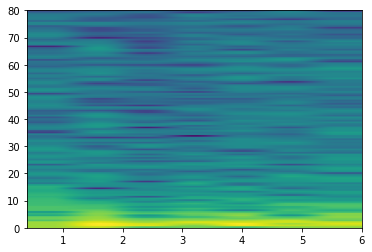

(129, 7)


In [62]:
Sxx, f,t, im = specgram(df_train1.values[3, i*1120:(i+1)*1120], Fs=fs, detrend='mean', mode='phase')
plt.show()

print(np.shape(Sxx))

In [38]:
bag_count = 0
N = 160*2
T = 1/fs
bagfft = df_train1.values[1, i*1120:(i+1)*1120]
yf = fft(bagfft)
xf = fftfreq(N, T)[:N//2]
yff = 2.0/N * np.abs(yf[0:N//2])
yf_im = yf[0:N//2].imag
yf_real = yf[0:N//2].real

save_yff = yff

In [59]:
np.shape(save_yff)

(160,)

(array([[ 3.14159265e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  3.14159265e+00,  3.14159265e+00,
          0.00000000e+00],
        [ 1.09162240e-01, -1.57691203e+00, -2.94411996e+00,
          2.07170408e+00,  6.76902455e-01,  5.89637285e+00,
         -1.81830662e+00],
        [ 3.09389310e+00,  1.55327087e+00, -5.95838851e+00,
          5.06169111e+00, -2.34362235e+00,  2.79975811e+00,
          1.24297297e+00],
        [ 6.20616771e+00,  4.22645653e+00, -2.84916581e+00,
          7.85982014e+00, -5.16265856e+00,  2.04184705e-02,
          4.11678744e+00],
        [ 3.12064999e+00,  6.40550710e+00, -4.80107025e-01,
          7.64956638e+00, -4.71440775e+00, -3.10138737e+00,
          6.96521286e+00],
        [-4.92154163e-03,  9.03590646e+00,  2.62777064e+00,
          1.03127251e+01, -6.30894785e+00, -1.13981935e+00,
          9.32816774e+00],
        [ 3.00913832e+00,  1.21641406e+01,  3.78752754e+00,
          8.62351757e+00, -8.88607754e+00, -4.25631805e+00

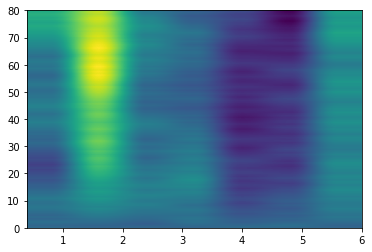

In [52]:
fs = 160
specgram(df_train1.values[1, i*1120:(i+1)*1120], Fs=fs, detrend='mean', mode='phase')

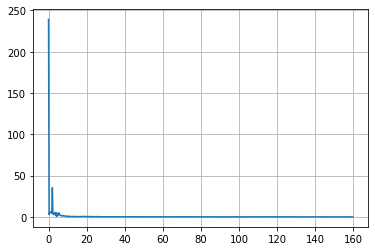

In [44]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 1120
# sample spacing
T = 1.0 / (fs*2)
x = np.linspace(0.0, N*T, N, endpoint=False)
y = df_train1.values[1, i*1120:(i+1)*1120]
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [ ]:
if spect == True:
    col_c =  col_c+1
    # Real-time FFT ------------------------------------
    N = 2500
    maxN = 629
    T = 1.0/2500

    font                   = cv2.FONT_HERSHEY_PLAIN
    fontScale              = 1.5
    fontColor              = (255,255,255)
    thickness              = 1

    if col_c > shft:
        bag_count = bag_count + 1
    if bag_count == bag_m:
        hz_max_c = hz_max_c + 1
        bag_count = 0
        yf = fft(bagfft)
        xf = fftfreq(N, T)[:N//2]
        yff = 2.0/N * np.abs(yf[0:N//2])
        yf_im = yf[0:N//2].imag
        yf_real = yf[0:N//2].real

        save_yff = yff

        if fft_save_bool == 1:
            fft_save_c = fft_save_c + 1
            if fft_save_sount == 0:
                fft_real_file = open('fft_data_real'+str(fft_save_c)+'.csv', mode = 'w')
                fft_im_file = open('fft_data_im'+str(fft_save_c)+'.csv', mode = 'w')      

                fft_real_writer = csv.writer(fft_real_file)
                fft_im_writer = csv.writer(fft_im_file)
                fft_save_sount = 1
            if fft_save_sount == 1:
                fft_im_writer.writerow(yf_im)
                fft_real_writer.writerow(yf_real)
                fft_save_bool = 0


            amp_max = max(yff)
            yff_old = (yff/intensity)*255 
            sum_interval = sum(yff_old[340:370])
            yff = to_rgb(yff)
            yff[340] = yff[340]+(0,0,255)
            yff[370] = yff[370]+(0,0,255)

        if hz_max_c > 10:    
            out_maxx = max_hz(yff_old)

            m[0:maxN-shft] = m[shft:maxN]
            m[maxN-shft:maxN] = yff[0:630]
            (cX, cY) = (630 // 2, 630 // 2)
            rot = cv2.getRotationMatrix2D((cX, cY), 90, 1.0)
            rotated = cv2.warpAffine(m, rot, (630, 630))
            col_c = 0
        if save_bool == 1:
            current_time = datetime.datetime.now()
            saved_spec = "spectrogram_" +str(current_time.month)+"_"+str(current_time.day)+"_"+str(current_time.hour)+"_"+str(current_time.minute)+"_"+str(current_time.second)+".bmp"
            try:    
                cv2.imwrite('saved_spectrograms/'+saved_spec, m)
            except:
                rospy.loginfo("SAVING FAILED")
            else:
                rospy.loginfo("SPECTROGRAM SAVED SUCCESSFULLY| FILENAME: " + saved_spec)
                save_bool = 0



    if hz_max_c > 10:
        for i in range(0,len(out_maxx)):
            rotated = cv2.putText(rotated, str(out_maxx[i])+' Hz', (100,630-out_maxx[i]), font, fontScale, fontColor, thickness, cv2.LINE_AA)
    spectr_image = cv2.resize(rotated, (630,630))
    spectr_image = cv2.putText(spectr_image,"AMP_max "+str(amp_max), (430, 20), font1, fontScale1, fontColor1, thickness1, cv2.LINE_AA)

In [27]:
if spect == True:
   col_c =  col_c+1
   # Real-time FFT ------------------------------------
   N = 2500
   maxN = 629
   T = 1.0/2500
  
   font                   = cv2.FONT_HERSHEY_PLAIN
   fontScale              = 1.5
   fontColor              = (255,255,255)
   thickness              = 1

   if col_c > shft:
    bag_count = bag_count + 1
    if bag_count == bag_m:
     hz_max_c = hz_max_c + 1
     bag_count = 0
     yf = fft(bagfft)
     xf = fftfreq(N, T)[:N//2]
     yff = 2.0/N * np.abs(yf[0:N//2])
     yf_im = yf[0:N//2].imag
     yf_real = yf[0:N//2].real
     
     save_yff = yff

     if fft_save_bool == 1:
      fft_save_c = fft_save_c + 1
      if fft_save_sount == 0:
       fft_real_file = open('fft_data_real'+str(fft_save_c)+'.csv', mode = 'w')
       fft_im_file = open('fft_data_im'+str(fft_save_c)+'.csv', mode = 'w')      

       fft_real_writer = csv.writer(fft_real_file)
       fft_im_writer = csv.writer(fft_im_file)
       fft_save_sount = 1
      if fft_save_sount == 1:
       fft_im_writer.writerow(yf_im)
       fft_real_writer.writerow(yf_real)
      fft_save_bool = 0
       

     amp_max = max(yff)
     yff_old = (yff/intensity)*255 
     sum_interval = sum(yff_old[340:370])
     yff = to_rgb(yff)
     yff[340] = yff[340]+(0,0,255)
     yff[370] = yff[370]+(0,0,255)

     if hz_max_c > 10:    
      out_maxx = max_hz(yff_old)
   
     m[0:maxN-shft] = m[shft:maxN]
     m[maxN-shft:maxN] = yff[0:630]
     (cX, cY) = (630 // 2, 630 // 2)
     rot = cv2.getRotationMatrix2D((cX, cY), 90, 1.0)
     rotated = cv2.warpAffine(m, rot, (630, 630))
     col_c = 0
     if save_bool == 1:
      current_time = datetime.datetime.now()
      saved_spec = "spectrogram_" +str(current_time.month)+"_"+str(current_time.day)+"_"+str(current_time.hour)+"_"+str(current_time.minute)+"_"+str(current_time.second)+".bmp"
      try:    
       cv2.imwrite('saved_spectrograms/'+saved_spec, m)
      except:
       rospy.loginfo("SAVING FAILED")
      else:
       rospy.loginfo("SPECTROGRAM SAVED SUCCESSFULLY| FILENAME: " + saved_spec)
      save_bool = 0

       

   if hz_max_c > 10:
    for i in range(0,len(out_maxx)):
     rotated = cv2.putText(rotated, str(out_maxx[i])+' Hz', (100,630-out_maxx[i]), font, fontScale, fontColor, thickness, cv2.LINE_AA)
   spectr_image = cv2.resize(rotated, (630,630))
   spectr_image = cv2.putText(spectr_image,"AMP_max "+str(amp_max), (430, 20), font1, fontScale1, fontColor1, thickness1, cv2.LINE_AA)

NameError: name 'spect' is not defined